# The Training Phase

#### Import pandas and all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Load the dataset, split it into 70% training set and 30% test set.
save the training set in a file called training.csv, and the test set in a file called test.csv. don't forget to shuffle the dataframe before splitting.
**Hint:** don't `use train_test_split()`, instead, use pandas `iloc[]` function.

In [2]:
diabetes_dataset = pd.read_csv('Diabetes dataset.csv') 

# Shuffle the data
df = diabetes_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(0.7 * len(df))
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Save the training set to a CSV file
train_df.to_csv('training.csv', index=False)

# Save the test set to a CSV file
test_df.to_csv('test.csv', index=False)

#### Load the file training.csv that you saved in a new data frame.

In [3]:
train_df = pd.read_csv('training.csv') 

#### View information about the dataset.

In [4]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Clean the dataset.
drop the useless columns, deal with the null values.   
will you drop the rows, or use pandas mean(), or use sklearn simple Imputer?

In [7]:
for column in train_df.columns:
	num_zeros = (train_df[column] == 0).sum()

	print(f"Number of zeros in {column}: {num_zeros}")    

Number of zeros in Pregnancies: 82
Number of zeros in Glucose: 4
Number of zeros in BloodPressure: 29
Number of zeros in SkinThickness: 163
Number of zeros in Insulin: 261
Number of zeros in BMI: 10
Number of zeros in DiabetesPedigreeFunction: 0
Number of zeros in Age: 0
Number of zeros in Outcome: 348


In [8]:
col=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [9]:
train_df[col]=train_df[col].replace(0, np.NaN) 

In [10]:
train_df.isna().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                29
SkinThickness               163
Insulin                     261
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
imputer = SimpleImputer(strategy='mean')

imputer.fit(train_df[col])

train_df[col] = imputer.transform(train_df[col])

In [12]:
train_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.000000,190.000000,34.0,0.430,43,0
1,2,112.0,75.0,32.000000,158.536232,35.7,0.148,21,0
2,2,108.0,64.0,29.248663,158.536232,30.8,0.158,21,0
3,8,107.0,80.0,29.248663,158.536232,24.6,0.856,34,0
4,7,136.0,90.0,29.248663,158.536232,29.9,0.210,50,0


#### [BONUS++] Detect if there are any outliers in the dataset, if any, how will you deal with them ?

In [14]:
def has_outliers(dataframe, variable):
    q20, q80 = dataframe[variable].quantile([0.20, 0.80])
    iqr = q80 - q20
    low_limit= q20 - 1.5 * iqr
    up_limit= q80 + 1.5 * iqr
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")    

In [15]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        q20, q80 = dataframe[variable].quantile([0.20, 0.80])
        iqr = q80 - q20
        low_limit= q20 - 1.5 * iqr
        up_limit= q80 + 1.5 * iqr
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit     

In [16]:
for col in train_df.columns:
    has_outliers(train_df, col)

BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes


In [17]:
replace_with_thresholds(train_df, train_df.columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

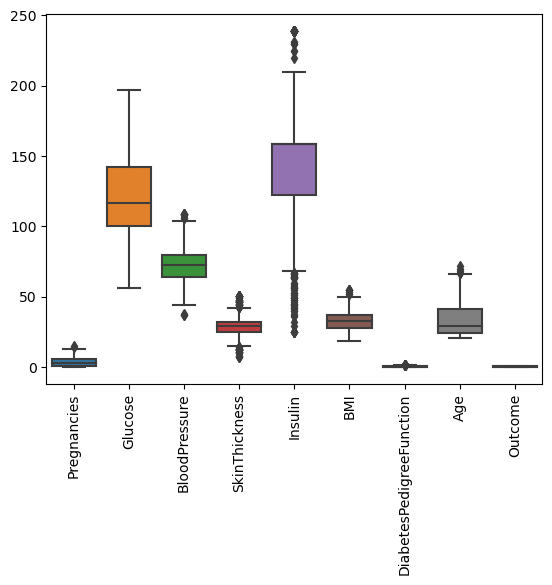

In [18]:
sns.boxplot(data=train_df)
plt.xticks(rotation=90)

#### Provide at least one drawing (histogram, pie chart, etc ..) that you see fit, about the dataset.

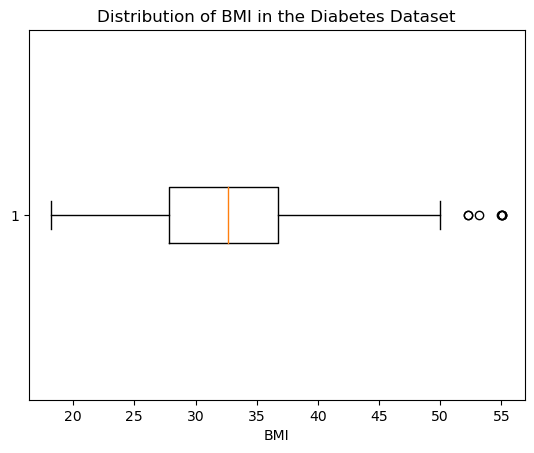

In [19]:
# Plot a box plot of the BMI variable
plt.boxplot(train_df['BMI'], vert=False)
plt.xlabel('BMI')
plt.title('Distribution of BMI in the Diabetes Dataset')
plt.show()

# Plot a histogram of the Glucose variable


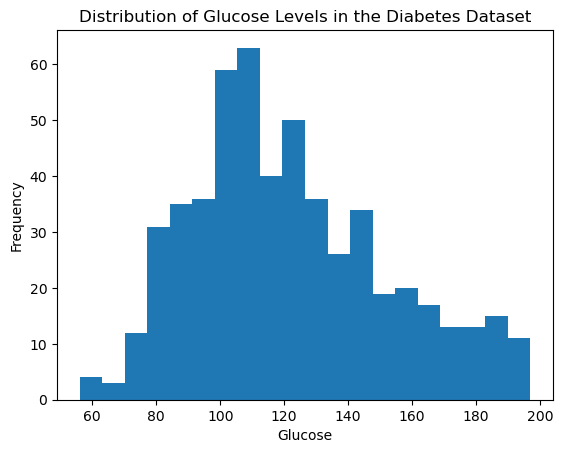

In [20]:
# Plot a histogram of the Glucose variable
plt.hist(train_df['Glucose'], bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Levels in the Diabetes Dataset')
plt.show()

#### Draw a pie chart for the outcome label.

Text(0.5, 1.0, 'outcome')

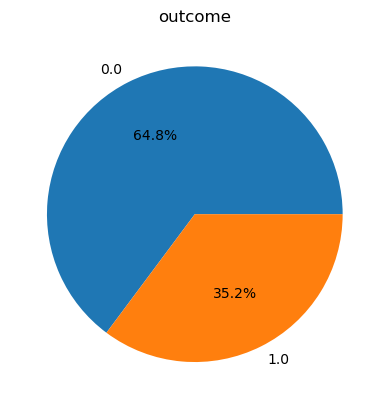

In [21]:
counts = train_df['Outcome'].value_counts()

# Create a pie chart using matplotlib
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')

# Add a title to the plot
plt.title('outcome')

#### Draw a histogram to see the distribution of ages.

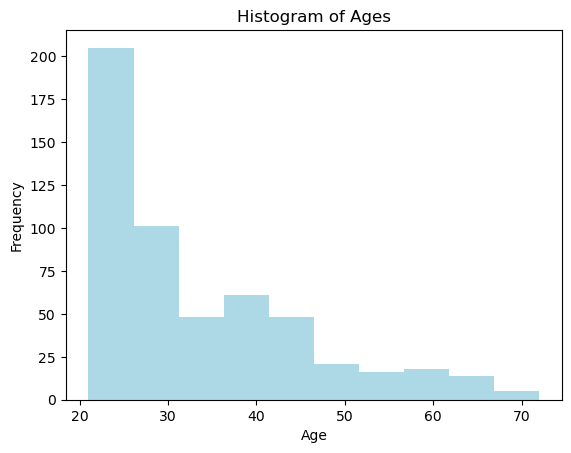

In [22]:
plt.hist(train_df['Age'], bins=10, color='lightblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()

#### Use KBinsDiscretizer to convert age into 5 categories.

In [23]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

age_bins_train = kbins.fit_transform(train_df['Age'].values.reshape(-1, 1))

train_df['age_bins'] = age_bins_train

In [24]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,98.0,58.0,33.000000,190.000000,34.0,0.430,43,0.0,2.0
1,2,112.0,75.0,32.000000,158.536232,35.7,0.148,21,0.0,0.0
2,2,108.0,64.0,29.248663,158.536232,30.8,0.158,21,0.0,0.0
3,8,107.0,80.0,29.248663,158.536232,24.6,0.856,34,0.0,1.0
4,7,136.0,90.0,29.248663,158.536232,29.9,0.210,50,0.0,2.0


#### Use Standard Scaler to scale the data.

In [25]:
scaler = StandardScaler()

train_df_scaled = scaler.fit_transform(train_df.drop(['Outcome', 'age_bins'], axis=1))


train_df_scaled =pd.concat([pd.DataFrame(train_df_scaled, columns=train_df.columns.drop(['Outcome', 'age_bins'])),train_df[['Outcome', 'age_bins']]], axis=1)

print(train_df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.641921 -0.783165      -1.246737       0.475793  0.867413  0.198985   
1    -0.541638 -0.325137       0.179960       0.354153  0.232924  0.448105   
2    -0.541638 -0.456002      -0.743197       0.019481  0.232924 -0.269946   
3     1.233701 -0.488718       0.599577       0.019481  0.232924 -1.178500   
4     0.937811  0.460053       1.438810       0.019481  0.232924 -0.401833   

   DiabetesPedigreeFunction       Age  Outcome  age_bins  
0                 -0.113783  0.811249      0.0       2.0  
1                 -1.043815 -1.055177      0.0       0.0  
2                 -1.010835 -1.055177      0.0       0.0  
3                  1.291157  0.047711      0.0       1.0  
4                 -0.839340  1.405112      0.0       2.0  


#### Split the training data frame into X and y 

In [27]:
# Split X and y for training data
X_train = train_df_scaled.drop('Outcome', axis=1)
y_train = train_df_scaled['Outcome']

In [28]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_bins
0,0.641921,-0.783165,-1.246737,0.475793,0.867413,0.198985,-0.113783,0.811249,2.0
1,-0.541638,-0.325137,0.179960,0.354153,0.232924,0.448105,-1.043815,-1.055177,0.0
2,-0.541638,-0.456002,-0.743197,0.019481,0.232924,-0.269946,-1.010835,-1.055177,0.0
3,1.233701,-0.488718,0.599577,0.019481,0.232924,-1.178500,1.291157,0.047711,1.0
4,0.937811,0.460053,1.438810,0.019481,0.232924,-0.401833,-0.839340,1.405112,2.0


#### Train an SVM Classifier, tune it's hyperparameters use GridsearchCV.    

In [29]:
# create the SVM classifier object
svm = SVC()

# define the hyperparameters to tune and their possible values
params = {'C': [0.1, 1, 10, 100],
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma': ['scale', 'auto']}

# create the GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(svm, param_grid=params, cv=5)

# fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# print the best hyperparameters and their score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.769055036344756


In [30]:
grid.score(X_train, y_train)

0.8286778398510242

#### Print the classification report for the best estimator.  

In [31]:
# Get the best estimator from the GridSearchCV object
best_estimator = grid.best_estimator_

# Predict the target variable for the test data
y_pred_train = best_estimator.predict(X_train)

# Print the classification report for the best estimator
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       348
         1.0       0.82      0.66      0.73       189

    accuracy                           0.83       537
   macro avg       0.83      0.79      0.80       537
weighted avg       0.83      0.83      0.82       537



#### Plot the confusion matrix.  

<AxesSubplot:>

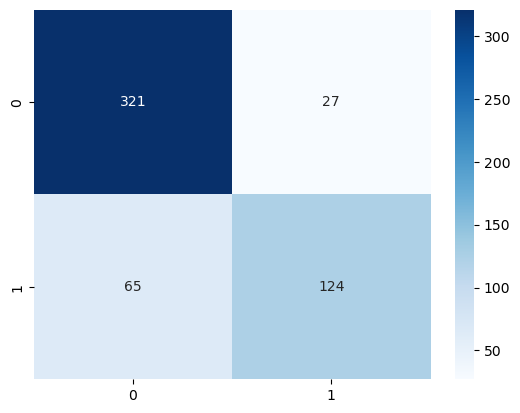

In [32]:
conf_mat = confusion_matrix(y_train, y_pred_train)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

#### [BONUS] Try other classifiers  
try XGBoost, CatBoost, Light GBM, decision tree and plot the tree, try a library called Lazy Predict. Try some Auto ML Libraries like PyCaret.   

In [40]:
!pip install catboost

In [35]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 2.2 MB/s eta 0:00:00


In [36]:
!pip install lazypredict

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)


In [37]:
!pip install pycaret

     -------------------------------------- 483.5/483.5 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 106.8/106.8 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 150.0/150.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 65.9/65.9 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 572.7/572.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 16.1/16.1 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 81.2/81.2 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 46.4/46.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'do

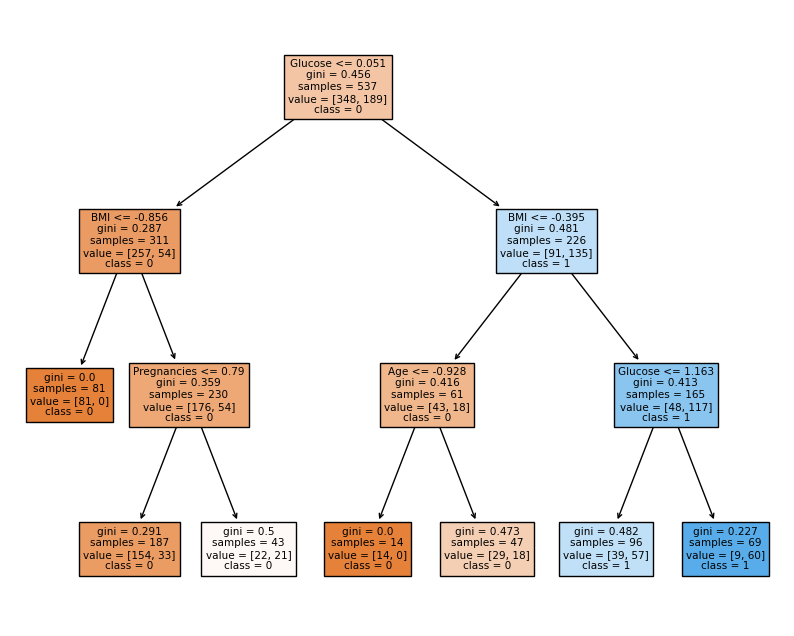

0.776536312849162

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dt_clf = DecisionTreeClassifier(max_depth=3)

dt_clf.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_tree(dt_clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()
dt_clf.score(X_train, y_train)

In [33]:
from xgboost import XGBClassifier
# Train an XGBClassifier on the training set
xbg_clf = XGBClassifier()
xbg_clf.fit(X_train, y_train)

# Get the accuracy on the training set
train_acc = xbg_clf.score(X_train, y_train)
print("Accuracy on train data:", train_acc)

Accuracy on train data: 1.0


In [34]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier()

cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)

# Get the accuracy on the training set
train_acc = cat_clf.score(X_train, y_train)
print("Accuracy on train data:", train_acc)

Learning rate set to 0.0079
0:	learn: 0.6886680	total: 154ms	remaining: 2m 33s
1:	learn: 0.6841566	total: 159ms	remaining: 1m 19s
2:	learn: 0.6806224	total: 163ms	remaining: 54.1s
3:	learn: 0.6765299	total: 166ms	remaining: 41.3s
4:	learn: 0.6719189	total: 169ms	remaining: 33.6s
5:	learn: 0.6683681	total: 172ms	remaining: 28.5s
6:	learn: 0.6647632	total: 175ms	remaining: 24.8s
7:	learn: 0.6607647	total: 177ms	remaining: 22s
8:	learn: 0.6573884	total: 179ms	remaining: 19.7s
9:	learn: 0.6534028	total: 181ms	remaining: 18s
10:	learn: 0.6502556	total: 183ms	remaining: 16.5s
11:	learn: 0.6469930	total: 185ms	remaining: 15.3s
12:	learn: 0.6432120	total: 187ms	remaining: 14.2s
13:	learn: 0.6393528	total: 189ms	remaining: 13.3s
14:	learn: 0.6359311	total: 191ms	remaining: 12.5s
15:	learn: 0.6322626	total: 193ms	remaining: 11.9s
16:	learn: 0.6289513	total: 195ms	remaining: 11.3s
17:	learn: 0.6262529	total: 197ms	remaining: 10.7s
18:	learn: 0.6228774	total: 199ms	remaining: 10.2s
19:	learn: 0.61

192:	learn: 0.3970077	total: 545ms	remaining: 2.28s
193:	learn: 0.3965623	total: 547ms	remaining: 2.27s
194:	learn: 0.3960319	total: 549ms	remaining: 2.27s
195:	learn: 0.3954511	total: 551ms	remaining: 2.26s
196:	learn: 0.3949401	total: 553ms	remaining: 2.25s
197:	learn: 0.3943848	total: 555ms	remaining: 2.25s
198:	learn: 0.3935574	total: 557ms	remaining: 2.24s
199:	learn: 0.3930548	total: 559ms	remaining: 2.23s
200:	learn: 0.3925130	total: 561ms	remaining: 2.23s
201:	learn: 0.3918817	total: 563ms	remaining: 2.22s
202:	learn: 0.3914760	total: 565ms	remaining: 2.22s
203:	learn: 0.3909455	total: 567ms	remaining: 2.21s
204:	learn: 0.3905657	total: 569ms	remaining: 2.21s
205:	learn: 0.3901492	total: 571ms	remaining: 2.2s
206:	learn: 0.3896425	total: 573ms	remaining: 2.19s
207:	learn: 0.3890909	total: 574ms	remaining: 2.19s
208:	learn: 0.3886334	total: 576ms	remaining: 2.18s
209:	learn: 0.3879142	total: 578ms	remaining: 2.17s
210:	learn: 0.3874289	total: 580ms	remaining: 2.17s
211:	learn: 0

381:	learn: 0.3263091	total: 923ms	remaining: 1.49s
382:	learn: 0.3259928	total: 926ms	remaining: 1.49s
383:	learn: 0.3255837	total: 928ms	remaining: 1.49s
384:	learn: 0.3252681	total: 930ms	remaining: 1.49s
385:	learn: 0.3246999	total: 932ms	remaining: 1.48s
386:	learn: 0.3244611	total: 934ms	remaining: 1.48s
387:	learn: 0.3242289	total: 936ms	remaining: 1.48s
388:	learn: 0.3239458	total: 938ms	remaining: 1.47s
389:	learn: 0.3236699	total: 940ms	remaining: 1.47s
390:	learn: 0.3232883	total: 942ms	remaining: 1.47s
391:	learn: 0.3230477	total: 944ms	remaining: 1.46s
392:	learn: 0.3227681	total: 946ms	remaining: 1.46s
393:	learn: 0.3225426	total: 948ms	remaining: 1.46s
394:	learn: 0.3223112	total: 950ms	remaining: 1.46s
395:	learn: 0.3220721	total: 952ms	remaining: 1.45s
396:	learn: 0.3217545	total: 954ms	remaining: 1.45s
397:	learn: 0.3214860	total: 957ms	remaining: 1.45s
398:	learn: 0.3212692	total: 959ms	remaining: 1.44s
399:	learn: 0.3208996	total: 961ms	remaining: 1.44s
400:	learn: 

586:	learn: 0.2782292	total: 1.33s	remaining: 935ms
587:	learn: 0.2779956	total: 1.33s	remaining: 932ms
588:	learn: 0.2776528	total: 1.33s	remaining: 930ms
589:	learn: 0.2774486	total: 1.33s	remaining: 927ms
590:	learn: 0.2773146	total: 1.34s	remaining: 925ms
591:	learn: 0.2771255	total: 1.34s	remaining: 922ms
592:	learn: 0.2768395	total: 1.34s	remaining: 920ms
593:	learn: 0.2767367	total: 1.34s	remaining: 918ms
594:	learn: 0.2766079	total: 1.34s	remaining: 915ms
595:	learn: 0.2762717	total: 1.35s	remaining: 913ms
596:	learn: 0.2759953	total: 1.35s	remaining: 910ms
597:	learn: 0.2758539	total: 1.35s	remaining: 908ms
598:	learn: 0.2757303	total: 1.35s	remaining: 905ms
599:	learn: 0.2755119	total: 1.35s	remaining: 903ms
600:	learn: 0.2753036	total: 1.36s	remaining: 900ms
601:	learn: 0.2750284	total: 1.36s	remaining: 898ms
602:	learn: 0.2746905	total: 1.36s	remaining: 895ms
603:	learn: 0.2746558	total: 1.36s	remaining: 893ms
604:	learn: 0.2744313	total: 1.36s	remaining: 890ms
605:	learn: 

788:	learn: 0.2374025	total: 1.74s	remaining: 464ms
789:	learn: 0.2371946	total: 1.74s	remaining: 462ms
790:	learn: 0.2369813	total: 1.74s	remaining: 460ms
791:	learn: 0.2366900	total: 1.74s	remaining: 458ms
792:	learn: 0.2365046	total: 1.74s	remaining: 455ms
793:	learn: 0.2363152	total: 1.75s	remaining: 453ms
794:	learn: 0.2360092	total: 1.75s	remaining: 451ms
795:	learn: 0.2356882	total: 1.75s	remaining: 449ms
796:	learn: 0.2354806	total: 1.75s	remaining: 446ms
797:	learn: 0.2352692	total: 1.75s	remaining: 444ms
798:	learn: 0.2350787	total: 1.76s	remaining: 442ms
799:	learn: 0.2349853	total: 1.76s	remaining: 440ms
800:	learn: 0.2347860	total: 1.76s	remaining: 438ms
801:	learn: 0.2345402	total: 1.76s	remaining: 435ms
802:	learn: 0.2342879	total: 1.76s	remaining: 433ms
803:	learn: 0.2341791	total: 1.77s	remaining: 431ms
804:	learn: 0.2339595	total: 1.77s	remaining: 429ms
805:	learn: 0.2337583	total: 1.77s	remaining: 427ms
806:	learn: 0.2336149	total: 1.77s	remaining: 424ms
807:	learn: 

983:	learn: 0.2010995	total: 2.13s	remaining: 34.7ms
984:	learn: 0.2008599	total: 2.13s	remaining: 32.5ms
985:	learn: 0.2006711	total: 2.14s	remaining: 30.3ms
986:	learn: 0.2004379	total: 2.14s	remaining: 28.2ms
987:	learn: 0.2004075	total: 2.14s	remaining: 26ms
988:	learn: 0.2002171	total: 2.14s	remaining: 23.8ms
989:	learn: 0.1999930	total: 2.15s	remaining: 21.7ms
990:	learn: 0.1998709	total: 2.15s	remaining: 19.5ms
991:	learn: 0.1997390	total: 2.15s	remaining: 17.3ms
992:	learn: 0.1996838	total: 2.15s	remaining: 15.2ms
993:	learn: 0.1995810	total: 2.15s	remaining: 13ms
994:	learn: 0.1993674	total: 2.15s	remaining: 10.8ms
995:	learn: 0.1991683	total: 2.16s	remaining: 8.66ms
996:	learn: 0.1989579	total: 2.16s	remaining: 6.5ms
997:	learn: 0.1987948	total: 2.16s	remaining: 4.33ms
998:	learn: 0.1986361	total: 2.16s	remaining: 2.17ms
999:	learn: 0.1985063	total: 2.17s	remaining: 0us
Accuracy on train data: 0.957169459962756


In [35]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

# Get the accuracy on the training set
train_acc = lgb_clf.score(X_train, y_train)
print("Accuracy on train data:", train_acc)

Accuracy on train data: 1.0


In [36]:
from pycaret.classification import *
# Use PyCaret to perform automated machine learning
clf = setup(data=train_df, target='Outcome')
best_model = compare_models()
print("PyCaret best model:")
print(best_model)

,Description,Value
0,Session id,6305
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(537, 10)"
4,Transformed data shape,"(537, 10)"
5,Transformed train set shape,"(375, 10)"
6,Transformed test set shape,"(162, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7733,0.8432,0.5934,0.7300,0.6437,0.4826,0.4957,0.7640
rf,Random Forest Classifier,0.7733,0.8289,0.6148,0.7161,0.6535,0.4877,0.4974,0.2060
lda,Linear Discriminant Analysis,0.7706,0.8419,0.5934,0.7199,0.6393,0.4763,0.4889,0.1470
ridge,Ridge Classifier,0.7679,0.0000,0.5780,0.7243,0.6332,0.4689,0.4818,0.1340
et,Extra Trees Classifier,0.7624,0.8286,0.6000,0.7049,0.6398,0.4653,0.4756,0.2160
catboost,CatBoost Classifier,0.7624,0.8349,0.6225,0.6978,0.6489,0.4715,0.4809,0.8640
lightgbm,Light Gradient Boosting Machine,0.7520,0.8266,0.6000,0.6807,0.6264,0.4438,0.4540,0.2950
gbc,Gradient Boosting Classifier,0.7518,0.8305,0.6005,0.6881,0.6319,0.4479,0.4569,0.1700
nb,Naive Bayes,0.7463,0.8216,0.6610,0.6408,0.6456,0.4495,0.4540,0.1390
xgboost,Extreme Gradient Boosting,0.7305,0.7933,0.5912,0.6364,0.6043,0.4021,0.4093,0.1750


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

PyCaret best model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6305, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [64]:
from lazypredict.Supervised import LazyClassifier
# Use Lazy Predict to compare the performance of multiple classifiers
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)
print("Lazy Predict accuracy scores:")
print(models)

100%|██████████| 29/29 [00:00<00:00, 31.01it/s]

Lazy Predict accuracy scores:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.74     0.74      0.74   
GaussianNB                         0.75               0.72     0.72      0.75   
XGBClassifier                      0.74               0.72     0.72      0.75   
LGBMClassifier                     0.75               0.72     0.72      0.75   
PassiveAggressiveClassifier        0.75               0.71     0.71      0.75   
KNeighborsClassifier               0.76               0.70     0.70      0.75   
DecisionTreeClassifier             0.71               0.69     0.69      0.71   
SVC                                0.76               0.69     0.69      0.75   
NuSVC                              0.76               0.69     0.69      0.75   
QuadraticDiscriminantAnalysis      0.74               0.69     0.69      0.74  

In [41]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [ ]:
# models = [('LR', LogisticRegression()),
#           ('KNN', KNeighborsClassifier()),
#           ('CART', DecisionTreeClassifier()),
#           ('RF', RandomForestClassifier()),
#           ('SVR', SVC(gamma='auto')),
#           ('XGBM', XGBClassifier()),
#           ('GB',GradientBoostingClassifier()),
#           ("LightGBM", LGBMClassifier())]

In [ ]:
# # evaluate each model in turn
# results = []
# names = []

# for name, model in models:
#     kfold = KFold(n_splits=10)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

LR: 0.769147 (0.056591)
KNN: 0.733543 (0.063183)
CART: 0.724528 (0.053672)
RF: 0.759644 (0.068353)
SVR: 0.750314 (0.061563)
XGBM: 0.709539 (0.045306)
GB: 0.767051 (0.052283)
LightGBM: 0.733683 (0.040745)


#### Save the model as a pkl file.


In [37]:
import pickle
# Save the trained model as a pkl file
with open('Diabetes.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)

#### [BONUS] SkLearn Pipelines  
If you are able to make this into a single sklearn pipeline (ColumnTransformer-> Onehotencoder -> StandardScaler-> SVM) pkl file, I will give you full mark + bonus + 10 pounds. to get the bonus I need your production code to look like this: `model = pkl.load(model) - model.predict(test set)` all in a single sklearn pipeline, no pandas no nothing.  

In [38]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
import pickle
train_df_pip=pd.read_csv('training.csv') 

# Define the features and target variable
X = train_df_pip.drop('Outcome', axis=1)
y = train_df_pip['Outcome']



# Define the column transformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
             ('num', StandardScaler(), ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    ])

# Create the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svm', svm_model)])

# Fit the pipeline on the data
pipeline.fit(X, y)

# Save the pipeline as a .pkl file
with open('diabetes_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [39]:
pipeline.score(X,y)   

0.7783985102420856

In [40]:
test_df_pip=pd.read_csv('test.csv') 
X_t = test_df_pip.drop('Outcome', axis=1)
y_t = test_df_pip['Outcome']

In [41]:
with open('diabetes_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)
predictions = pipeline.predict(X_t)    

In [42]:
pipeline.score(X_t,y_t)   

0.7922077922077922

# The Production Phase !    

#### Load the test set, do your transformations as you did with the training set. 

In [43]:
test_df = pd.read_csv('test.csv') 

In [44]:
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,24,19,25,27.8,0.559,21,0
1,2,197,70,45,543,30.5,0.158,53,1
2,4,90,88,47,54,37.7,0.362,29,0
3,11,138,76,0,0,33.2,0.420,35,0
4,0,91,68,32,210,39.9,0.381,25,0
...,...,...,...,...,...,...,...,...,...
226,5,139,64,35,140,28.6,0.411,26,0
227,1,96,122,0,0,22.4,0.207,27,0
228,10,101,86,37,0,45.6,1.136,38,1
229,0,141,0,0,0,42.4,0.205,29,1


In [45]:
for column in test_df.columns:
	num_zeros = (test_df[column] == 0).sum()

	print(f"Number of zeros in {column}: {num_zeros}")    

Number of zeros in Pregnancies: 29
Number of zeros in Glucose: 1
Number of zeros in BloodPressure: 6
Number of zeros in SkinThickness: 64
Number of zeros in Insulin: 113
Number of zeros in BMI: 1
Number of zeros in DiabetesPedigreeFunction: 0
Number of zeros in Age: 0
Number of zeros in Outcome: 152


In [47]:
col=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [48]:
test_df[col]=test_df[col].replace(0, np.NaN) 
test_df.isna().sum()

Pregnancies                   0
Glucose                       1
BloodPressure                 6
SkinThickness                64
Insulin                     113
BMI                           1
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [49]:
test_df[col] = imputer.transform(test_df[col])

In [50]:
replace_with_thresholds(test_df, test_df.columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

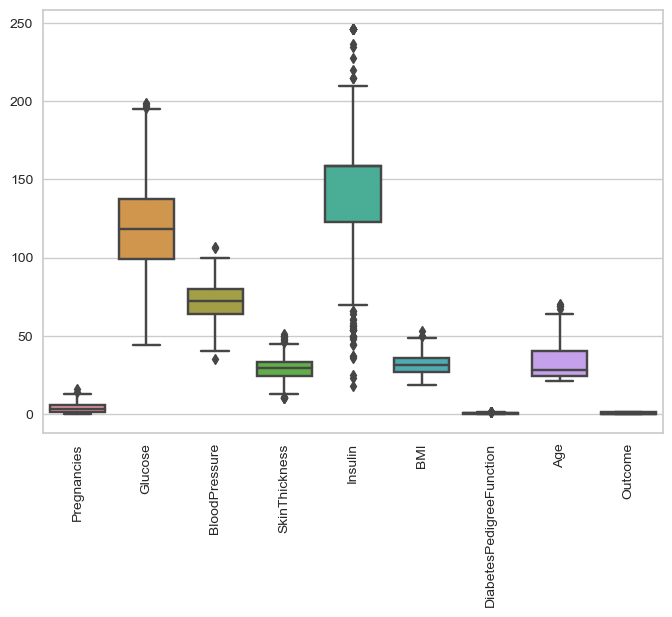

In [51]:
sns.boxplot(data=test_df)
plt.xticks(rotation=90)

In [52]:
age_bins_test = kbins.transform(test_df['Age'].values.reshape(-1, 1))

test_df['age_bins'] = age_bins_test

In [53]:
test_df_scaled = scaler.transform(test_df.drop(['Outcome', 'age_bins'], axis=1))
test_df_scaled = pd.concat([pd.DataFrame(test_df_scaled, columns=test_df.columns.drop(['Outcome', 'age_bins'])),test_df[['Outcome', 'age_bins']]], axis=1)

In [54]:
# Split X and y for test data
X_test = test_df_scaled.drop('Outcome', axis=1)
y_test = test_df_scaled['Outcome']

#### Load the model from the pkl file, use it to predict on the test set.

In [55]:
import pickle

# Load the trained model from the pkl file
with open('Diabetes.pkl', 'rb') as f:
    model = pickle.load(f)

In [56]:
y_predit_test=model.predict(X_test)

#### Print the classification report.  
reflect on the results in terms of F1 score, precision and recall. Is the model overfitting, underfitting and why?

In [57]:
# Print the classification report
print(classification_report(y_test, y_predit_test))

              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       152
         1.0       0.73      0.48      0.58        79

    accuracy                           0.76       231
   macro avg       0.75      0.69      0.71       231
weighted avg       0.76      0.76      0.75       231



#### Plot the confusion matrix, reflect on the results

<AxesSubplot:>

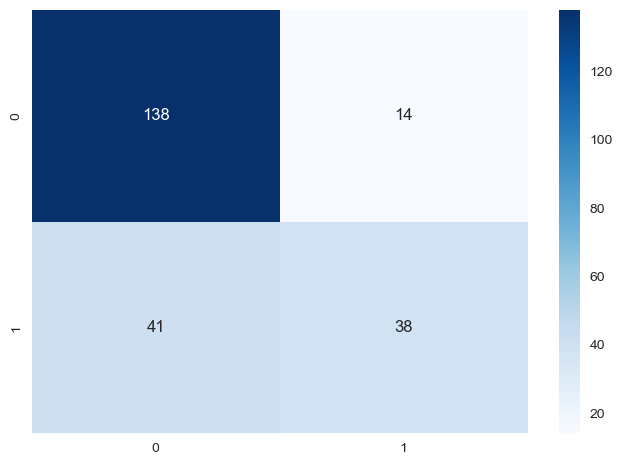

In [58]:
conf_mat = confusion_matrix(y_test, y_predit_test)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

#### Compare the training accuracy vs test accuracy.
reflect on the results, is your model underfitting or overfitting? and why?.  
Draw a bar plot comparing the two.  

In [59]:
from sklearn.metrics import accuracy_score

# y_train_true and y_train_pred are the true and predicted labels for the training dataset, respectively
train_acc = accuracy_score(y_train, y_pred_train)

# y_test_true and y_test_pred are the true and predicted labels for the test dataset, respectively
test_acc = accuracy_score(y_test, y_predit_test)
print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.8286778398510242
Test Accuracy: 0.7619047619047619


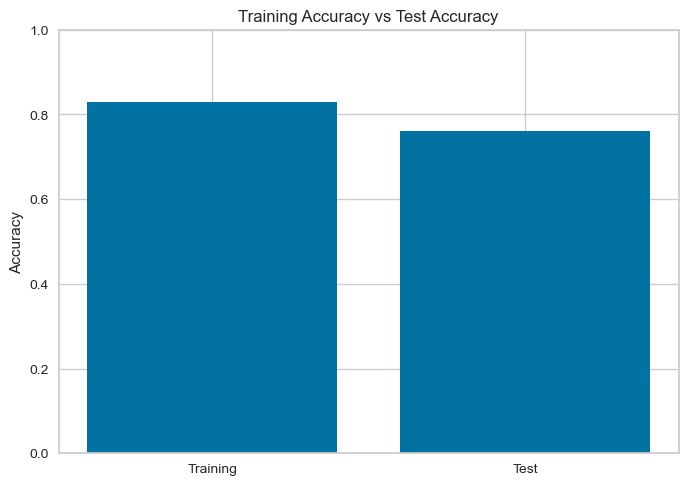

In [60]:
# train_acc and test_acc are the training and test accuracies, respectively
labels = ['Training', 'Test']
values = [train_acc, test_acc]

plt.bar(labels, values)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.show()

<AxesSubplot:>

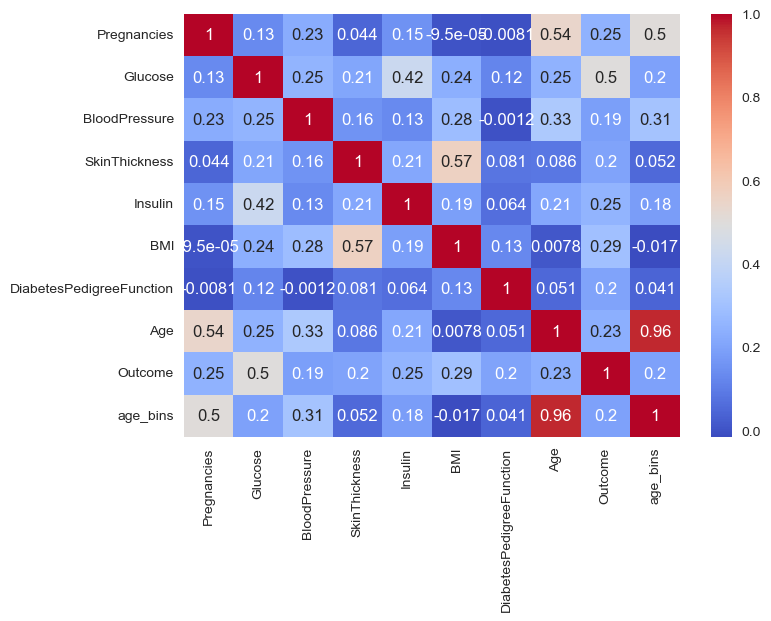

In [61]:
corr=train_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

#### [BONUS] Can you plot the decision boundaries for 2 features?  
Hint: steal some code form the internet, google: python plot decision boundary or ask chatGPT

In [62]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Separate the features and target variable
X = X_train
y = y_train

# Perform univariate feature selection
selector = SelectKBest(f_classif, k=2)  # Select the top 2 features
selector.fit(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Print the names of the selected features
print("Selected features:", selected_features)

Selected features: Index(['Glucose', 'BMI'], dtype='object')


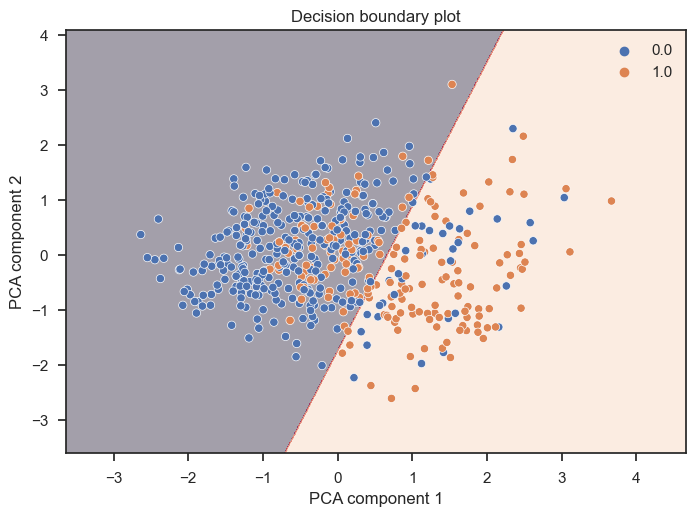

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
sns.set(style="ticks")

# Load the diabetes dataset

# Select two features to use for plotting decision boundaries
feature_names = ['Glucose', 'BMI']
X = train_df[feature_names].values
y = train_df['Outcome'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Train a logistic regression model on the data
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# Add plot labels and title
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Decision boundary plot')

plt.show()